In [38]:
import pandas as pd
data = pd.read_csv("./titanic_train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

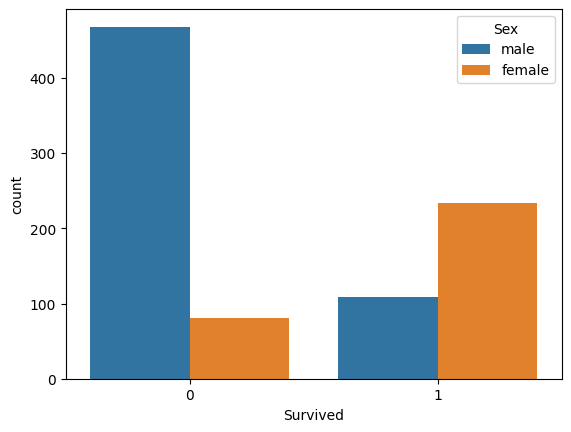

In [40]:
import seaborn as sb
sb.countplot(x="Survived", hue="Sex", data=data)

In [41]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

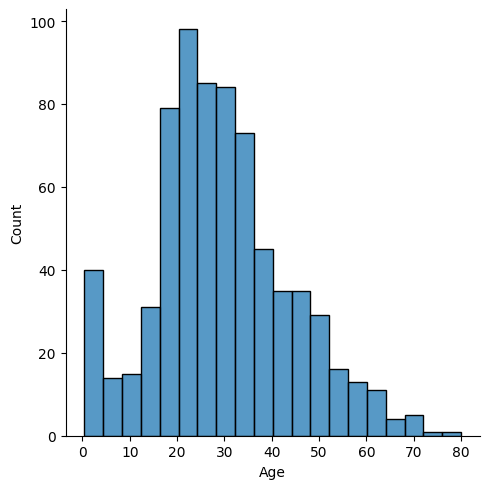

In [42]:
sb.displot(x="Age", data=data)

In [43]:
data["Age"].mean()

29.69911764705882

In [44]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [45]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
data = data.dropna()


In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [48]:
data = data.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1)

In [49]:
sex_dummies = pd.get_dummies(data["Sex"], drop_first=True, dtype=int)
data = data.join(sex_dummies)
data = data.drop(["Sex"],axis=1)

<Axes: xlabel='Survived', ylabel='count'>

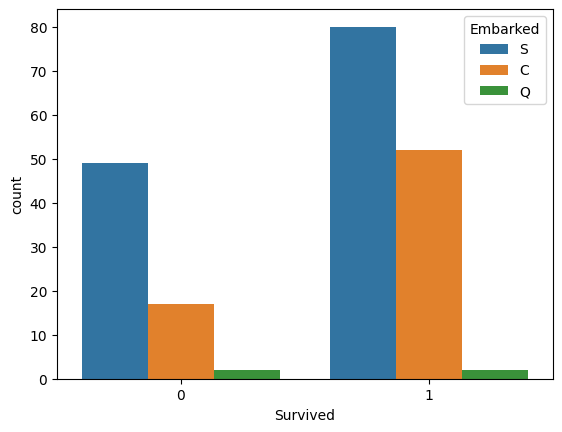

In [50]:
sb.countplot(x="Survived", data=data, hue="Embarked")

In [51]:
embarked_dummies = pd.get_dummies(data["Embarked"], drop_first=True, dtype=int)
embarked_dummies
data = data.join(embarked_dummies)
data = data.drop(["Embarked"], axis=1)

<Axes: >

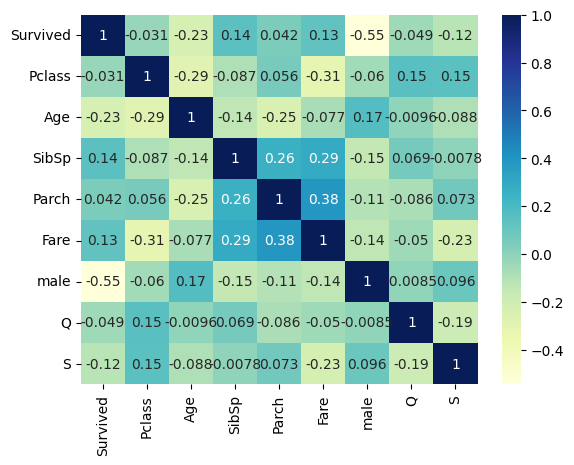

In [52]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='Survived', ylabel='count'>

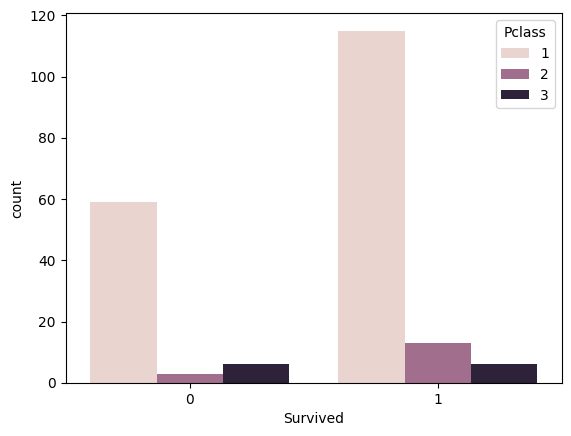

In [53]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [54]:
x = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [56]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=50)
model.fit(x_train, y_train)
predictions = model.predict(x_test)


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7560975609756098

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
results = []
for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    presicion = accuracy_score(y_test, predictions)
    print(f"The result for {i} is: {presicion}")
    results.append(presicion)


The result for 1 is: 0.7804878048780488
The result for 2 is: 0.7804878048780488
The result for 3 is: 0.7804878048780488
The result for 4 is: 0.7560975609756098
The result for 5 is: 0.7317073170731707
The result for 6 is: 0.6341463414634146
The result for 7 is: 0.7560975609756098
The result for 8 is: 0.6829268292682927
The result for 9 is: 0.7560975609756098
The result for 10 is: 0.7560975609756098
The result for 11 is: 0.7804878048780488
The result for 12 is: 0.7560975609756098
The result for 13 is: 0.7560975609756098
The result for 14 is: 0.7804878048780488


<Axes: >

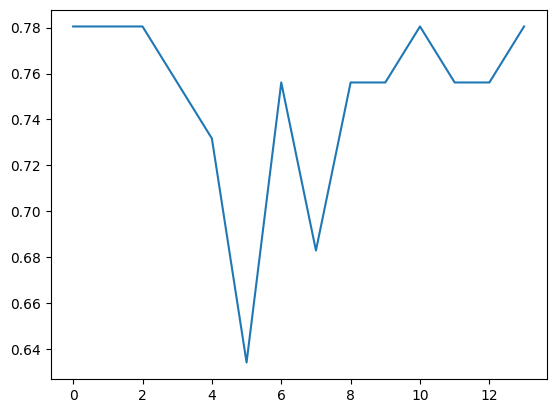

In [59]:
sb.lineplot(data=results)

In [60]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
presicion = accuracy_score(y_test, predictions)

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.78      0.75      0.76        28

    accuracy                           0.68        41
   macro avg       0.64      0.64      0.64        41
weighted avg       0.69      0.68      0.69        41



In [62]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, predictions)
pd.DataFrame(confusion_matrix(y_test, predictions), columns=["Pred: NO", "Pred: Yes"], index=["Real: No", "Real: Yes"])

,Pred: NO,Pred: Yes
Real: No,7,6
Real: Yes,7,21


In [63]:
x_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.2962962962962963, 0.9444444444444444, 'male <= 0.5\n0.45\n161\n[55, 106]\nSurvived'),
 Text(0.07407407407407407, 0.8333333333333334, 'Fare <= 10.481\n0.145\n76\n[6, 70]\nSurvived'),
 Text(0.037037037037037035, 0.7222222222222222, '0.0\n2\n[2, 0]\nDied'),
 Text(0.1111111111111111, 0.7222222222222222, 'Age <= 3.0\n0.102\n74\n[4, 70]\nSurvived'),
 Text(0.07407407407407407, 0.6111111111111112, '0.0\n1\n[1, 0]\nDied'),
 Text(0.14814814814814814, 0.6111111111111112, 'Age <= 49.5\n0.079\n73\n[3, 70]\nSurvived'),
 Text(0.07407407407407407, 0.5, 'Fare <= 143.592\n0.032\n62\n[1, 61]\nSurvived'),
 Text(0.037037037037037035, 0.3888888888888889, '0.0\n54\n[0, 54]\nSurvived'),
 Text(0.1111111111111111, 0.3888888888888889, 'Fare <= 158.208\n0.219\n8\n[1, 7]\nSurvived'),
 Text(0.07407407407407407, 0.2777777777777778, '0.0\n1\n[1, 0]\nDied'),
 Text(0.14814814814814814, 0.2777777777777778, '0.0\n7\n[0, 7]\nSurvived'),
 Text(0.2222222222222222, 0.5, 'Fare <= 40.096\n0.298\n11\n[2, 9]\nSurvived'),

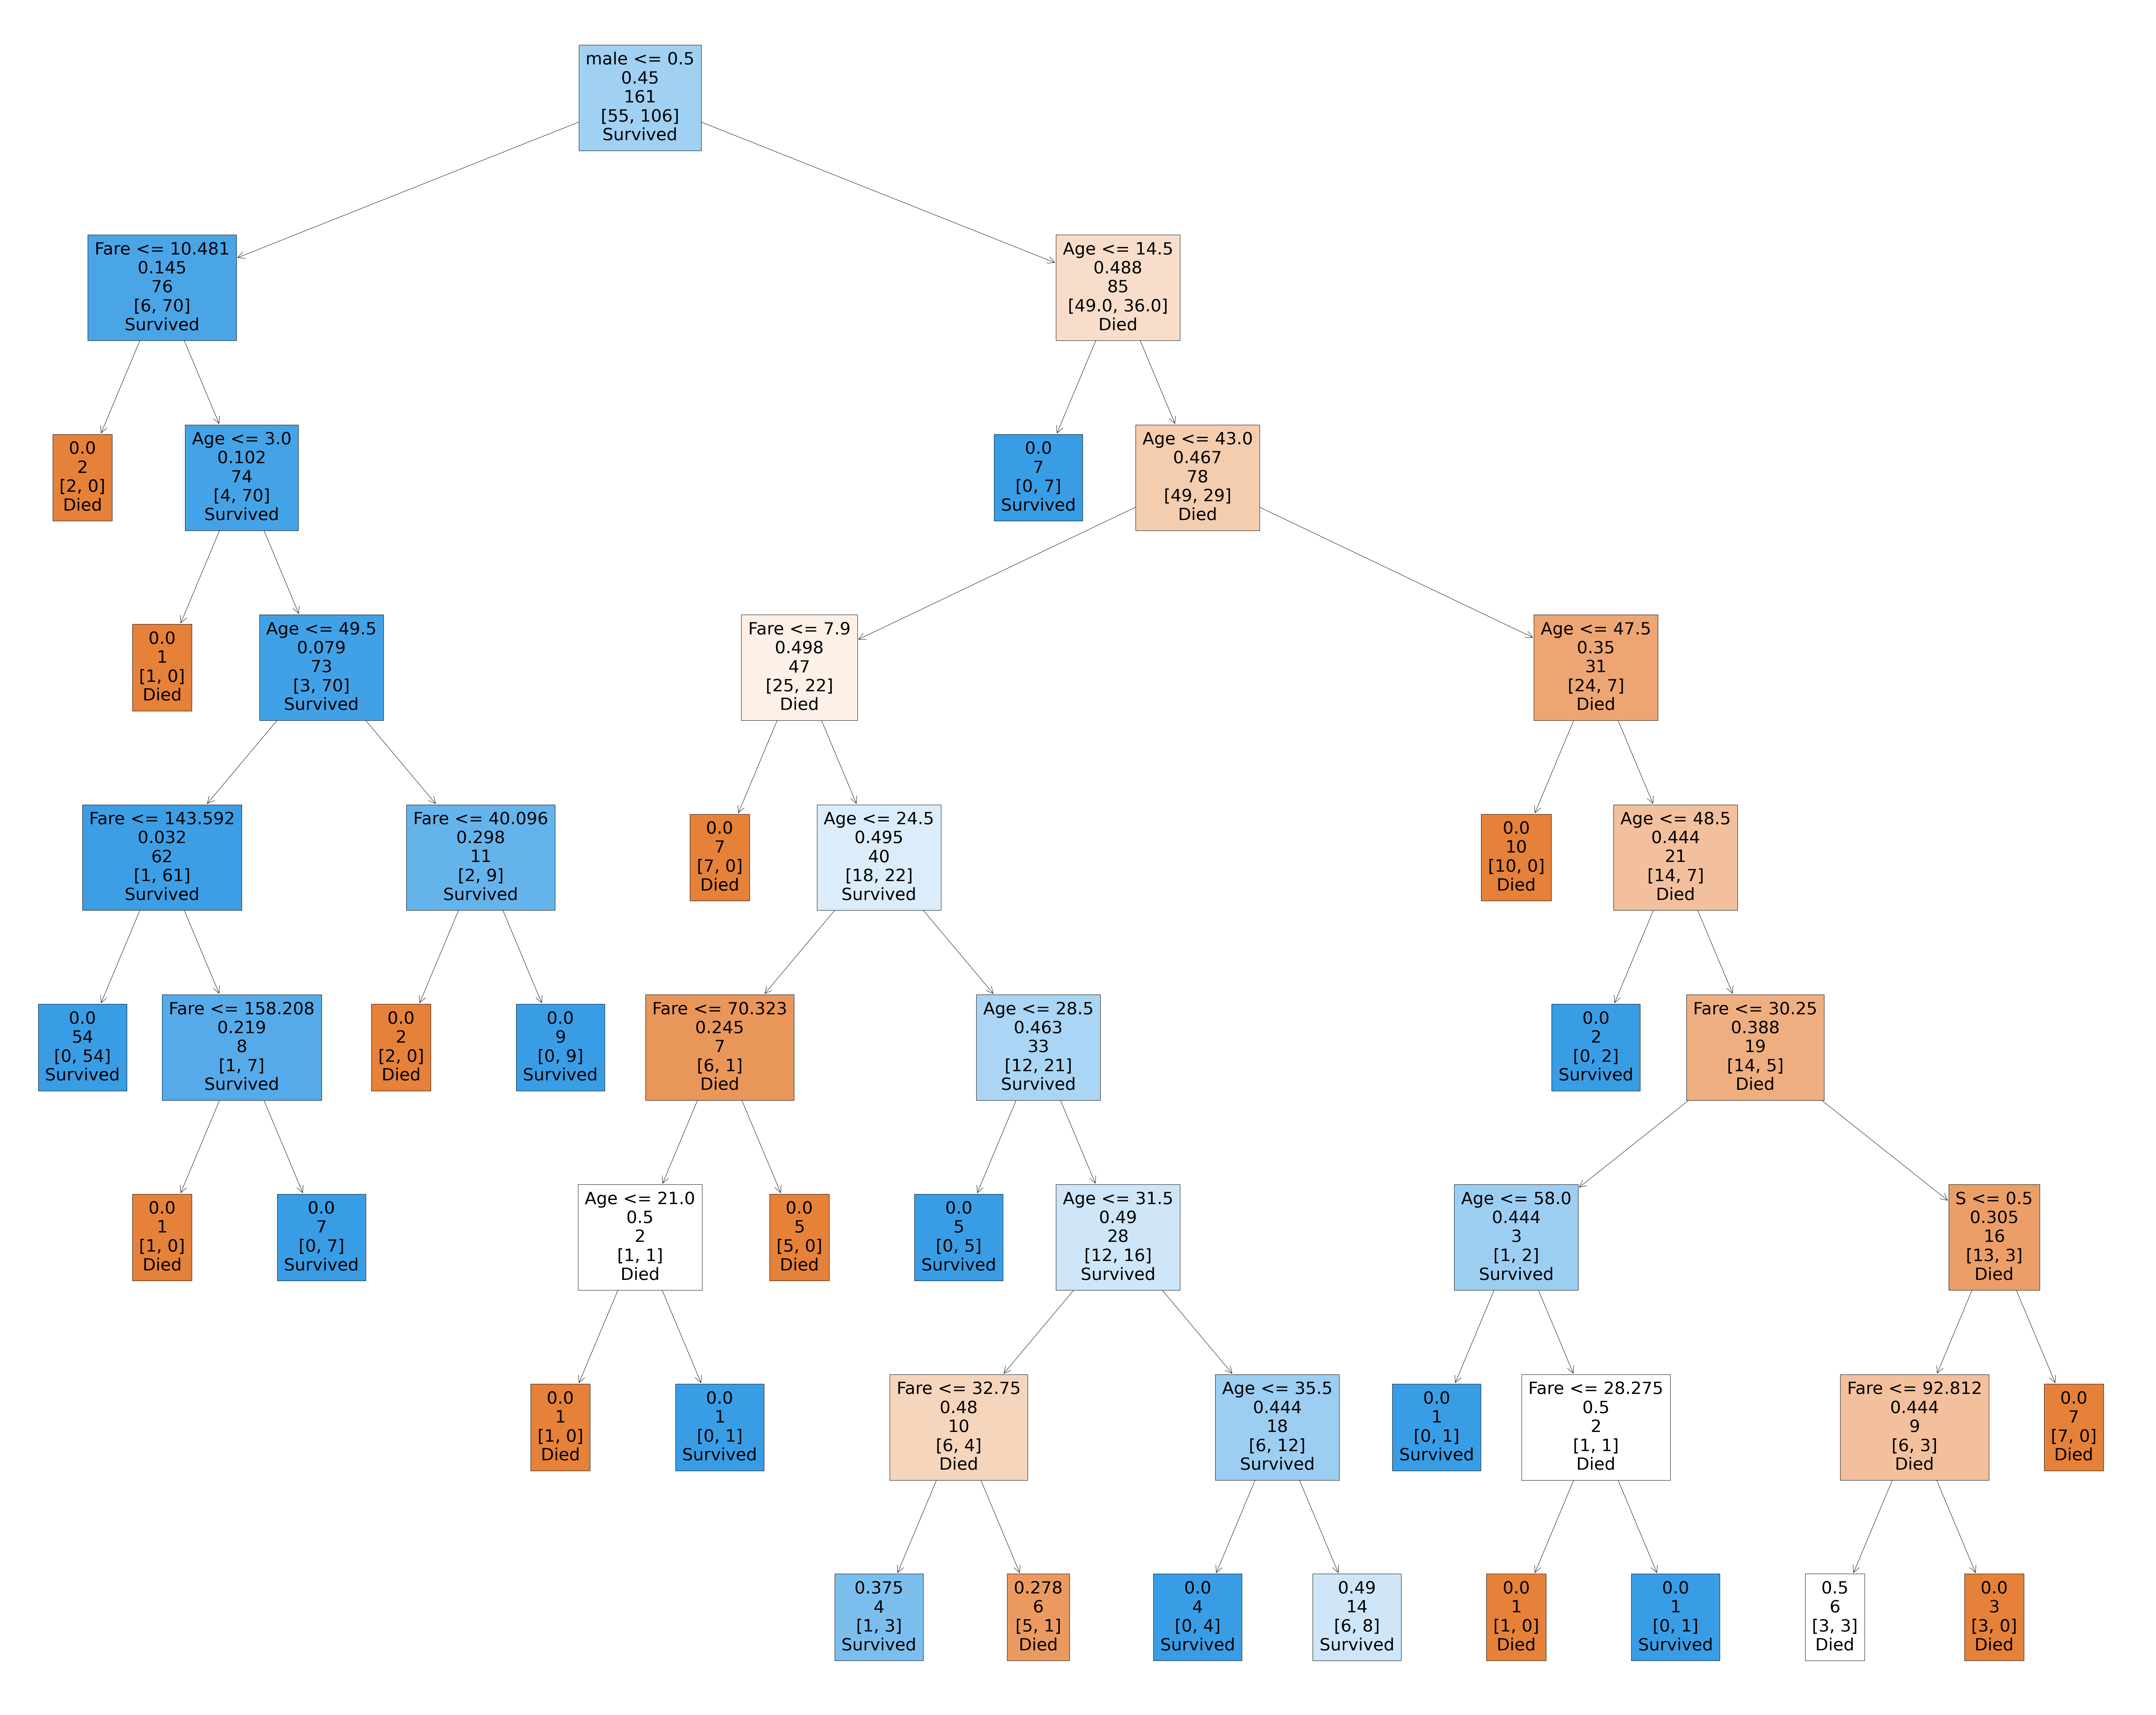

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    model,
    feature_names=x_train.columns,
    class_names=["Died", "Survived"],
    filled=True, 
    label="none"
)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7073170731707317